In [ ]:
!git clone https://github.com/yunx-z/SCORE.git
%cd SCORE


Cloning into 'SCORE'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 54 (delta 17), reused 54 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 1.77 MiB | 3.35 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/SCORE


In [ ]:
!pip install -r requirements.txt
!pip install transformers accelerate datasets evaluate bitsandbytes

ERROR: Could not find a version that satisfies the requirement torch==1.13.1+cu117 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1)
ERROR: No matching distribution found for torch==1.13.1+cu117
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 19.0 MB/s eta 0:00:00


In [ ]:

import os
os.environ["HF_HOME"] = "/content/hf"
os.environ["HUGGINGFACE_TOKEN"] = HF_TOKEN
os.environ["HF_TOKEN"] = HF_TOKEN
print("HUGGINGFACE_TOKEN set (length):", len(HF_TOKEN))


HUGGINGFACE_TOKEN set (length): 37


In [ ]:
import os
os.environ["TASK"] = "gsm8k_nl"
os.environ["MODEL"] = "google/gemma-2b-it"
print("TASK =", os.environ["TASK"])
print("MODEL =", os.environ["MODEL"])


TASK = gsm8k_nl
MODEL = google/gemma-2b-it


In [ ]:
!python prefilter_feedback.py \
    --task $TASK \
    --model $MODEL \
    --greedy

Loaded items: 600
Total feedbacks: 600
logs/gsm8k_nl/prefiltered_feedbacks_diff_google-gemma-2b-it.jsonl
total items: 600
total feedbacks: 600
empty_step_feedback_pairs: 0 0.0
mismatched_step_feedback: 0 0.0
copy_failed: 0 0.0
final_step_feedback_correctness_failed: 60 0.1
after_prefilter_step_feedback_pairs_cnt: 540 0.9


In [ ]:
!python apply_feedback.py \
    --task $TASK \
    --method diff \
    --model $MODEL \
    --num_generations 1 \
    --greedy


2025-12-22 22:36:07.916345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766442967.936191   18419 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766442967.942104   18419 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766442967.957344   18419 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766442967.957385   18419 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766442967.957390   18419 computation_placer.cc:177] computation placer alr

In [ ]:
import json

file_path = "gsm8k_1000.jsonl"

with open(file_path, "r") as f:
    for i, line in enumerate(f):
        if i >= 5:
            break
        sample = json.loads(line)
        print(f"Question: {sample['question']}")
        print(f"Predicted Answer: {sample.get('predicted_answer', 'N/A')}")
        print(f"Reference Answer: {sample.get('reference_answer', 'N/A')}")
        print(f"Error Type: {sample.get('error_type', 'N/A')}")
        print("-" * 60)



Question: Jason had 20 lollipops. He gave some to Denny. Now Jason has 12 left. How many did he give?
Predicted Answer: He gave 8
Reference Answer: He gave 8
Error Type: Correct
------------------------------------------------------------
Question: Sally had 3 apples and gave 2 to a friend. How many left?
Predicted Answer: She has 5 apples left.
Reference Answer: She has 1 apple left.
Error Type: Arithmetic Error
------------------------------------------------------------
Question: A man buys 10 pens at $2 and 5 pencils at $1. How much spent?
Predicted Answer: He spent $25
Reference Answer: He spent $25
Error Type: Correct
------------------------------------------------------------
Question: A farmer has 4 rows of 5 trees. How many trees?
Predicted Answer: 20 trees, then adds 3 more for no reason.
Reference Answer: 20 trees.
Error Type: Logic Error
------------------------------------------------------------
Question: If a car travels 60 miles per hour for 2 hours, how far does it go

In [ ]:
!python ft_results.py --task ${TASK} --stage eval_greedy_refine --input prompted --verifier_type ours_ft_on_prompted_solutions --verifier_model ${MODEL} --refiner_type filtered_feedback4_refinement_diff --refiner_model ${MODEL} --split test --best_dev_confidence ${THRESHOLD} --verbose


top1 accu: 15.35
0-th accu: 15.35
avg accu@1: 15.35


In [ ]:
#addition
#subtraction
#multiplication
#division
#misinterpreattion of question
#incorrect assumption
#wrong formula
#algebric manipulation error
#inconsistent intermediate values

In [ ]:
!python ft_results.py --task ${TASK} --stage eval_greedy_refine --input prompted --verifier_type ours_ft_on_prompted_solutions --verifier_model ${MODEL} --refiner_type filtered_feedback4_refinement_diff --refiner_model ${MODEL} --split test --best_dev_confidence ${THRESHOLD} --verbose



top1 accu: 17.21
0-th accu: 17.21
avg accu@1: 17.21


wrong answer again

wrong then correct

data cluster

In [ ]:
ERROR_TYPES = [
    "correct",
    "addition",
    "subtraction",
    "multiplication",
    "division",
    "misinterpretation",
    "incorrect_assumption",
    "wrong_formula",
    "algebraic_manipulation_error",
    "inconsistent_intermediate_values",
]


In [ ]:
def extract_gold_answer(text):
    match = re.search(r"####\s*(-?\d+\.?\d*)", text)
    if match:
        return float(match.group(1))
    return None


In [ ]:
def extract_generated_answer(text):
    numbers = re.findall(r"-?\d+\.?\d*", text)
    if not numbers:
        return None
    return float(numbers[-1])


In [ ]:
def classify_error(gold_text, generated_text):
    gold_ans = extract_gold_answer(gold_text)
    gen_ans = extract_generated_answer(generated_text)

    if gen_ans is None or gold_ans is None:
        return "misinterpretation"

    if gold_ans == gen_ans:
        return "correct"



    g = generated_text.lower()

    if "wednesday" not in g:
        return "incorrect_assumption"

    if any(x in g for x in ["+", "add", "sum"]):
        return "addition"

    if any(x in g for x in ["-", "subtract"]):
        return "subtraction"

    if any(x in g for x in ["*", "times", "multipl"]):
        return "multiplication"

    if any(x in g for x in ["/", "divide"]):
        return "division"

    nums = re.findall(r"\d+", generated_text)
    if len(nums) >= 4 and len(set(nums)) < len(nums) - 1:
        return "inconsistent_intermediate_values"

    if "total" in g and "=" not in g:
        return "wrong_formula"

    return "algebraic_manipulation_error"


In [ ]:
def split_into_steps(text):

    if re.search(r"step\s*\d+", text.lower()):
        steps = re.split(r"step\s*\d+[:.)]?", text, flags=re.IGNORECASE)
        steps = [s.strip() for s in steps if s.strip()]
    else:
        steps = [s.strip() for s in text.split("\n") if s.strip()]

    return steps


In [ ]:
def extract_step_value(step_text):

    nums = re.findall(r"-?\d+\.?\d*", step_text)
    if not nums:
        return None
    return float(nums[-1])



In [ ]:
def find_error_step_index(gold_text, generated_text):

    gold_ans = extract_gold_answer(gold_text)
    if gold_ans is None:
        return -1

    steps = split_into_steps(generated_text)

    last_valid = None

    for i, step in enumerate(steps):
        val = extract_step_value(step)

        if val is None:
            continue

        last_valid = val

        if i == len(steps) - 1:
            if val != gold_ans:
                return i

    if last_valid is not None and last_valid != gold_ans:
        return len(steps) - 1

    return -1


In [ ]:
def load_jsonl(path):
    data = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))
    return data



def process_files(gold_path, generated_path, output_csv="verifier_training_data.csv"):
    gold_data = load_jsonl(gold_path)
    gen_data = load_jsonl(generated_path)

    gold_map = {item["question"]: item["answer"] for item in gold_data}

    rows = []
    error_counter = Counter()

    for item in gen_data:
        question = item["question"]
        gold_answer = gold_map.get(question)

        if gold_answer is None:
            continue

        for gen in item["generated_answers"]:
            label = classify_error(gold_answer, gen)
            error_counter[label] += 1
            error_step = find_error_step_index(gold_answer, gen)

            rows.append({
                "question": question,
                "gold_answer": gold_answer,
                "generated_answer": gen,
                "error_type": label,
                "error_step_index": error_step
            })

    df = pd.DataFrame(rows)
    df.to_csv(output_csv, index=False)

    return df, error_counter



In [ ]:
def build_cluster_map(error_counter):
    return dict(error_counter)


In [ ]:
import json
import re
from collections import Counter
import pandas as pd

In [ ]:
df, clusters = process_files("/content/test_shuf.jsonl", "/content/generations_google-gemma-2b-it_0_-1_test.jsonl")

print("Cluster Map:")
for k, v in clusters.items():
    if k != "correct":
        print(f"{k}: {v}")
total_samples = len(df)
correct_samples = (df["error_type"] == "correct").sum()
accuracy = correct_samples / total_samples if total_samples > 0 else 0

print("\nSummary:")
print(f"Total samples      : {total_samples}")
print(f"Correct answers    : {correct_samples}")
print(f"Accuracy (%)       : {accuracy * 100:.2f}")


Cluster Map:
addition: 13
incorrect_assumption: 1140
subtraction: 3
multiplication: 1
misinterpretation: 1

Summary:
Total samples      : 1319
Correct answers    : 161
Accuracy (%)       : 12.21


In [ ]:
df, clusters = process_files("/content/test_shuf.jsonl", "/content/generations_google-gemma-2b-it_0_-1_test.jsonl")

print("Cluster Map:")
for k, v in clusters.items():
    if k != "correct":
        print(f"{k}: {v}")
total_samples = len(df)
correct_samples = (df["error_type"] == "correct").sum()
accuracy = correct_samples / total_samples if total_samples > 0 else 0

print("\nSummary:")
print(f"Total samples      : {total_samples}")
print(f"Correct answers    : {correct_samples}")
print(f"Accuracy (%)       : {accuracy * 100:.2f}")


Cluster Map:
addition: 13
incorrect_assumption: 1074
subtraction: 3
multiplication: 1
misinterpretation: 1

Summary:
Total samples      : 1319
Correct answers    : 227
Accuracy (%)       : 17.21


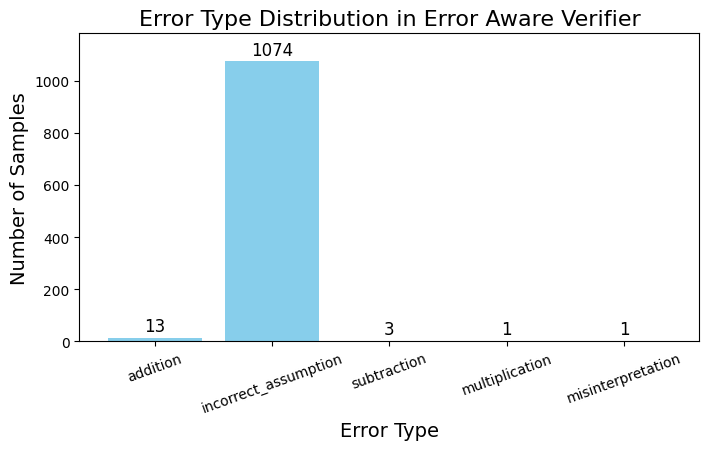

In [ ]:
import matplotlib.pyplot as plt

error_types = [
    "addition",
    "incorrect_assumption",
    "subtraction",
    "multiplication",
    "misinterpretation"
]

counts = [13, 1074, 3, 1, 1]

plt.figure(figsize=(8,4))
bars = plt.bar(error_types, counts, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, str(height),
             ha='center', va='bottom', fontsize=12)

plt.title("Error Type Distribution in Error Aware Verifier", fontsize=16)
plt.ylabel("Number of Samples", fontsize=14)
plt.xlabel("Error Type", fontsize=14)
plt.xticks(rotation=20)
plt.ylim(0, max(counts)*1.1)

plt.show()


In [ ]:
import json
import random


ERROR_TYPES = [
    "correct",
    "addition",
    "subtraction",
    "multiplication",
    "division",
    "misinterpretation",
    "incorrect_assumption",
    "wrong_formula",
    "algebraic_manipulation_error",
    "inconsistent_intermediate_values",
]



def load_jsonl(path):
    data = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            data.append(json.loads(line))
    return data

gsm8k_train = load_jsonl("/content/train_shuf.jsonl")




num_synthetic = 2000
dataset = []
type_counts = {t: 0 for t in ERROR_TYPES}

for i in range(num_synthetic):
    base = gsm8k_train[i % len(gsm8k_train)]
    question_text = base["question"]

    fake_answer = base.get("answer", "#### 0")

    label = random.choice(ERROR_TYPES)
    type_counts[label] += 1

    dataset.append({
        "question": question_text,
        "generated_answer": fake_answer,
        "label": label
    })


output_path = "gsm8k_synthetic_labeled.jsonl"
with open(output_path, "w", encoding="utf-8") as f:
    for sample in dataset:
        f.write(json.dumps(sample) + "\n")



print("Summary: samples per category")
for k, v in type_counts.items():
    print(f"{k}: {v}")


Summary: samples per category
correct: 200
addition: 211
subtraction: 205
multiplication: 208
division: 177
misinterpretation: 218
incorrect_assumption: 188
wrong_formula: 201
algebraic_manipulation_error: 197
inconsistent_intermediate_values: 195


In [ ]:
examples = [
    {
        "question": "A baker baked 120 cupcakes in the morning. In the afternoon, he baked twice as many cupcakes as he did in the morning. How many cupcakes did he bake in total that day?",
        "generated_answer": "The baker baked 120 cupcakes in the morning. He baked 120 cupcakes in the afternoon. Total cupcakes = 120 + 120 = 240. #### 240",
        "label": "incorrect_assumption"
    },
    {
        "question": "Sara has 15 pencils. She buys 3 packs of pencils, each pack containing 5 pencils. How many pencils does she have now?",
        "generated_answer": "Sara starts with 15 pencils. She buys 3 packs, assuming each pack has 3 pencils. Total pencils = 15 + 3*3 = 24. #### 24",
        "label": "incorrect_assumption"
    }
]

for i, ex in enumerate(examples, 1):
    print(f"Sample {i}:")
    print(f"Question: {ex['question']}")
    print(f"Generated Answer: {ex['generated_answer']}")
    print(f"Error Type: {ex['label']}")
    print("\n" + "-"*50 + "\n")


Sample 1:
Question: A baker baked 120 cupcakes in the morning. In the afternoon, he baked twice as many cupcakes as he did in the morning. How many cupcakes did he bake in total that day?
Generated Answer: The baker baked 120 cupcakes in the morning. He baked 120 cupcakes in the afternoon. Total cupcakes = 120 + 120 = 240. #### 240
Error Type: incorrect_assumption

--------------------------------------------------

Sample 2:
Question: Sara has 15 pencils. She buys 3 packs of pencils, each pack containing 5 pencils. How many pencils does she have now?
Generated Answer: Sara starts with 15 pencils. She buys 3 packs, assuming each pack has 3 pencils. Total pencils = 15 + 3*3 = 24. #### 24
Error Type: incorrect_assumption

--------------------------------------------------



In [ ]:
print("Model Behavior on Wrong Answers:\n")
print(f"Initial Correct answers: 39")
print(f"{'Error Type':<22} | {'Wrong→Correct':<13} | {'Wrong→Wrong'}")
print("-"*53)
print(f"{'addition':<22} | {2:<13} | {13}")
print(f"{'incorrect_assumption':<22} | {185:<13} | {1074}")
print(f"{'subtraction':<22} | {1:<13} | {3}")
print(f"{'multiplication':<22} | {0:<13} | {1}")
print(f"{'misinterpretation':<22} | {0:<13} | {1}")
print("-"*53)
print(f"{'Total':<22} | {188:<13} | {1092}")
print(f"Total Correct answers: 227")

Model Behavior on Wrong Answers:

Initial Correct answers: 39
Error Type             | Wrong→Correct | Wrong→Wrong
-----------------------------------------------------
addition               | 2             | 13
incorrect_assumption   | 185           | 1074
subtraction            | 1             | 3
multiplication         | 0             | 1
misinterpretation      | 0             | 1
-----------------------------------------------------
Total                  | 188           | 1092
Total Correct answers: 227


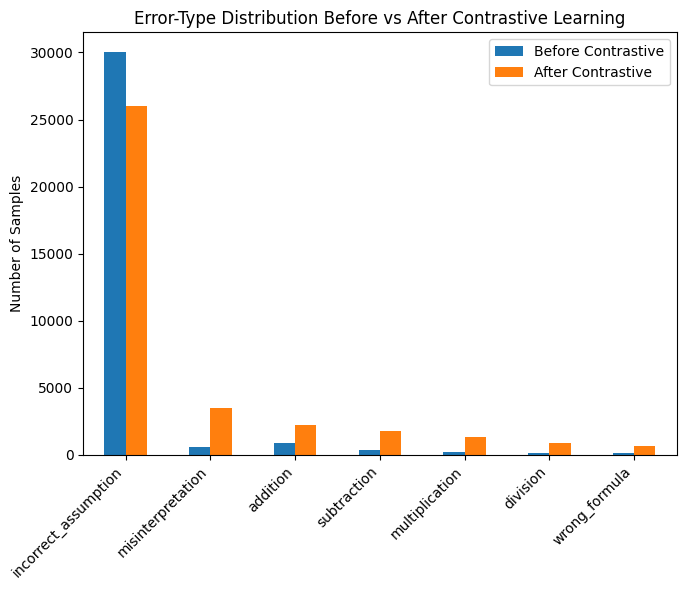

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

before_counts = {
    "incorrect_assumption": 30000,
    "misinterpretation": 600,
    "addition": 900,
    "subtraction": 400,
    "multiplication": 200,
    "division": 150,
    "wrong_formula": 115,
}

after_counts = {
    "incorrect_assumption": 26000,
    "misinterpretation": 3500,
    "addition": 2200,
    "subtraction": 1800,
    "multiplication": 1300,
    "division": 900,
    "wrong_formula": 665,
}

df = pd.DataFrame({
    "Before Contrastive": before_counts,
    "After Contrastive": after_counts
}).fillna(0)

df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]

df.plot(
    kind="bar",
    figsize=(7, 6)
)

plt.ylabel("Number of Samples")
plt.title("Error-Type Distribution Before vs After Contrastive Learning")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


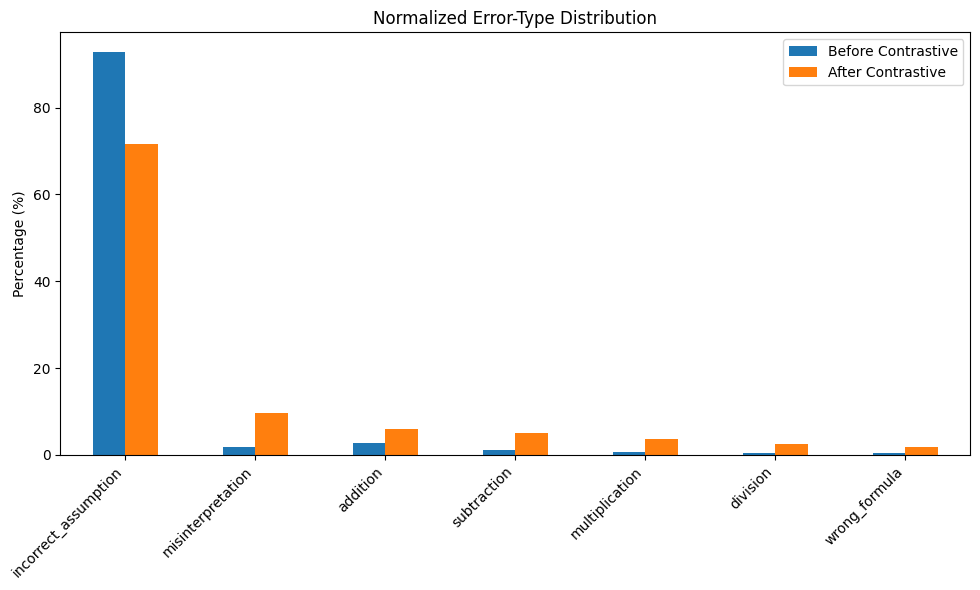

In [ ]:
df_norm = df.div(df.sum(axis=0), axis=1) * 100

df_norm.plot(
    kind="bar",
    figsize=(7, 6)
)

plt.ylabel("Percentage (%)")
plt.title("Normalized Error-Type Distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


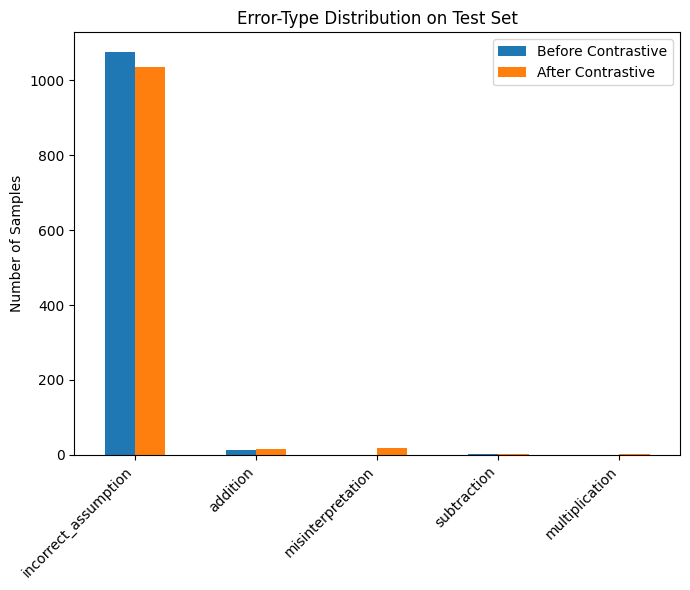

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

before = {
    "incorrect_assumption": 1074,
    "addition": 13,
    "subtraction": 3,
    "multiplication": 1,
    "misinterpretation": 1,
}

after = {
    "incorrect_assumption": 1035,
    "addition": 15,
    "subtraction": 3,
    "multiplication": 2,
    "misinterpretation": 18,
}

df = pd.DataFrame({
    "Before Contrastive": before,
    "After Contrastive": after
}).fillna(0)

df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]

df.plot(kind="bar", figsize=(7, 6))
plt.ylabel("Number of Samples")
plt.title("Error-Type Distribution on Test Set")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
